In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

d2l.init_Seed()
device = d2l.get_device()

GPU ready!


In [2]:
def poly(x, w, max_degree):
    features = x.pow(torch.arange(max_degree))
    for i in range(max_degree):
        features[:, i] /= math.gamma(i + 1)

    return features @ w

In [3]:
max_degree = 20
n_train, n_test = 100, 100
true_w = torch.zeros(max_degree)
true_w[0:4] = torch.tensor([5, 1.2, -3.4, 5.6])
true_w

tensor([ 5.0000,  1.2000, -3.4000,  5.6000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000])

In [4]:
X = torch.randn((n_train + n_test, 1))
y = poly(X, true_w, max_degree)
y += torch.normal(0, 0.2, y.shape)

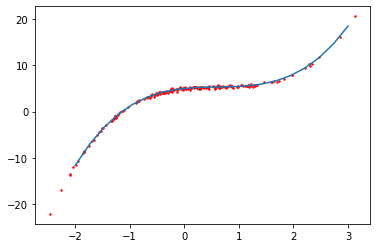

In [5]:
fig, ax = plt.subplots()
ax.scatter(X.numpy(), y.numpy(), c='red', s=2)

x = torch.linspace(-2, 3, 20).reshape(-1, 1)
ax.plot(x.numpy(), poly(x, true_w, max_degree).numpy())